Player First Name: Jay
Player Last Name: Beagle
Post Season y/n: n
Inputs: jay beagle
https://puckbase.com/stats/event-log?player=jay-beagle&type=faceoffs&&format=csv
   Opponent Result  Faceoffs
0       ANA   lost        15
1       ANA    won        21
2       ARI   lost        11
3       ARI    won        22
4       BUF   lost         5
5       BUF    won         7
6       CAR   lost         9
7       CAR    won        15
8       CBJ   lost        10
9       CBJ    won        16
10      CGY   lost        35
11      CGY    won        25
12      CHI   lost        12
13      CHI    won        11
14      COL   lost        16
15      COL    won        17
16      DAL   lost        15
17      DAL    won        29
18      DET   lost         4
19      DET    won         8
20      EDM   lost        27
21      EDM    won        29
22      FLA   lost        12
23      FLA    won        15
24      LAK   lost        12
25      LAK    won        20
26      MIN   lost         4
27      MIN    won   

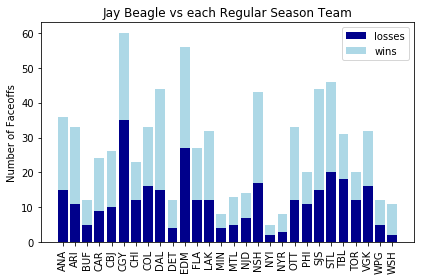

Which Team? EDM


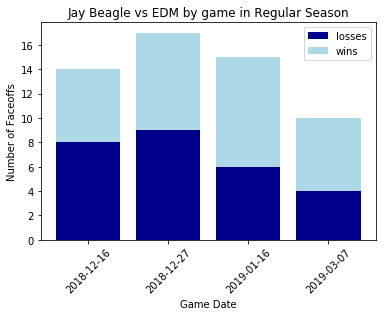

Result   Game date  lost  won  total  percent_win
0       2018-12-16     8    6     14     0.428571
1       2018-12-27     9    8     17     0.470588
2       2019-01-16     6    9     15     0.600000
3       2019-03-07     4    6     10     0.600000
Result    Face-off opponent  lost   won
0            Connor McDavid   4.0   6.0
1             Kyle Brodziak   8.0   5.0
2            Leon Draisaitl  11.0  10.0
3       Ryan Nugent-Hopkins   2.0   6.0
4              Ryan Spooner   1.0   2.0
Result  index    Face-off opponent  lost   won  total  percent_win
0           2       Leon Draisaitl  11.0  10.0   21.0     0.476190
1           1        Kyle Brodziak   8.0   5.0   13.0     0.384615
2           0       Connor McDavid   4.0   6.0   10.0     0.600000
3           3  Ryan Nugent-Hopkins   2.0   6.0    8.0     0.750000
4           4         Ryan Spooner   1.0   2.0    3.0     0.666667
5           5        Tobias Rieder   1.0   0.0    1.0     0.000000


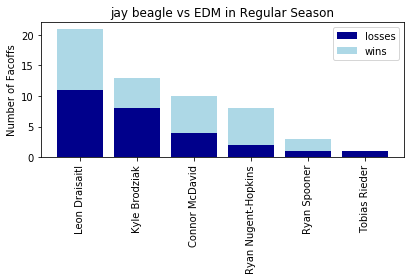

In [10]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun May  6 08:18:50 2018

@author: Anthony
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib2

first = raw_input('Player First Name: ')
last = raw_input('Player Last Name: ')
post_season = raw_input('Post Season y/n: ')

first = first.lower()
last = last.lower()
post_season = post_season.lower()

print("Inputs: " + first +" "+last)

url_add = ''
if post_season == 'y': 
    url_add = 'season=3'
    season = 'Post Season'
else:
    url_add= ''
    season='Regular Season'
url_1 = 'https://puckbase.com/stats/event-log?player='+first+'-'+last+'&type=faceoffs&'+url_add+'&format=csv'
print(url_1)
csv_url_1 = urllib2.urlopen(url_1)
df = pd.read_csv (csv_url_1,skiprows=4)

df['Faceoffs'] = df.index
df_opponents = df.groupby(['Opponent','Result'])['Faceoffs'].nunique().reset_index()

df_opponents_pivot = df_opponents.pivot(columns ='Result', index = 'Opponent', values = 'Faceoffs').reset_index()
df_opponents_pivot['total']=df_opponents_pivot.won+df_opponents_pivot.lost
df_opponents_pivot['percentage']=df_opponents_pivot.won/df_opponents_pivot.total
#df_opponents_pivot = df_opponents_pivot.sort_values('percentage', ascending=False).reset_index()
print(df_opponents)
print(df_opponents_pivot)
plt.bar(df_opponents_pivot.Opponent,df_opponents_pivot.lost,color='darkblue',label='losses')
plt.bar(df_opponents_pivot.Opponent,df_opponents_pivot.won,bottom=df_opponents_pivot.lost,color = 'lightblue',label = 'wins')
print(df.head())
plt.legend()
plt.title(first.capitalize() + ' ' + last.capitalize() + ' vs each '+ season+' Team')
plt.ylabel('Number of Faceoffs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(last+'_vs_'+ 'team.png')
plt.show()


team = raw_input('Which Team? ')
df_team = df[df.Opponent == team]
df_bygame = df_team.groupby(['Game date','Result'])['Faceoffs'].nunique().reset_index()


df_bygame_pivot = df_bygame.pivot(columns='Result',index = 'Game date', values = 'Faceoffs').reset_index()
df_bygame_pivot['total'] = df_bygame_pivot.lost+df_bygame_pivot.won
df_bygame_pivot = df_bygame_pivot.fillna(0)
df_bygame_pivot['percent_win'] = df_bygame_pivot.won/df_bygame_pivot.total
plt.bar(df_bygame_pivot['Game date'], df_bygame_pivot.lost,color='darkblue',label='losses')
plt.bar(df_bygame_pivot['Game date'], df_bygame_pivot.won,bottom=df_bygame_pivot.lost, color = 'lightblue',label='wins')
plt.title(first.capitalize() + ' ' + last.capitalize() + ' vs ' + team + ' by game in ' + season)
plt.ylabel('Number of Faceoffs')
plt.xlabel('Game Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()
print(df_bygame_pivot)

df_faceoff = df_team.groupby(['Face-off opponent','Result'])['Faceoffs'].nunique().reset_index()
df_faceoff_pivot = df_faceoff.pivot(columns='Result',index = 'Face-off opponent',values = 'Faceoffs').reset_index()
df_faceoff_pivot = df_faceoff_pivot.fillna(0)
print(df_faceoff_pivot.head())
df_faceoff_pivot['total'] = df_faceoff_pivot.lost+df_faceoff_pivot.won
df_faceoff_pivot['percent_win'] = df_faceoff_pivot.won/df_faceoff_pivot.total
df_faceoff_pivot = df_faceoff_pivot.sort_values('total', ascending = False).reset_index()
plt.bar(df_faceoff_pivot['Face-off opponent'],df_faceoff_pivot.lost,color='darkblue',label='losses')
plt.bar(df_faceoff_pivot['Face-off opponent'],df_faceoff_pivot.won,bottom=df_faceoff_pivot.lost,color='lightblue',label = 'wins')
plt.legend()
plt.title(first + ' ' + last + ' vs ' + team + ' in '+season)
plt.ylabel('Number of Facoffs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(last+'.png')
print(df_faceoff_pivot)
